In [206]:
!pip3 install scikit-learn

You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.9/bin/python3.9 -m pip install --upgrade pip' command.


In [207]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.decomposition import PCA
from IPython.display import Image

# iris dataset

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html

In [208]:
iris = datasets.load_iris()
df = pd.DataFrame(iris['data'], columns=iris['feature_names'])


In [209]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


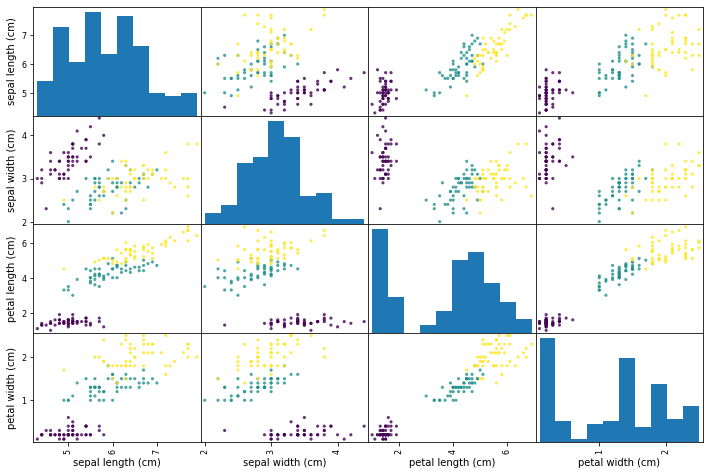

In [210]:
pd.plotting.scatter_matrix(df, c=iris['target'], marker='o', s=10, alpha=.8, figsize=(12, 8))
plt.show()

In [211]:
X = iris.data
Y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names
print(X.shape)
print(Y.shape)

(150, 4)
(150,)


In [212]:
print(target_names)

['setosa' 'versicolor' 'virginica']


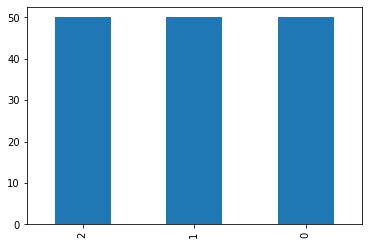

In [213]:
df_X = pd.DataFrame(X)
df_Y = pd.DataFrame(Y)
df_Y[0].value_counts().plot(kind='bar')
plt.show()

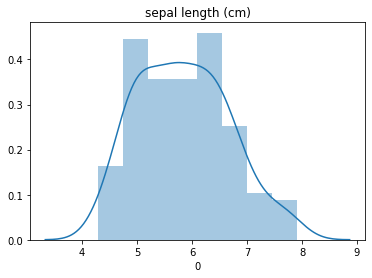

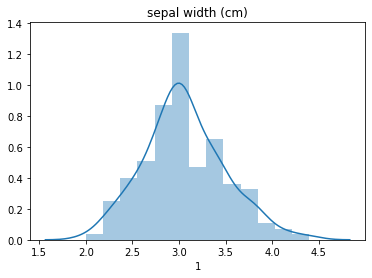

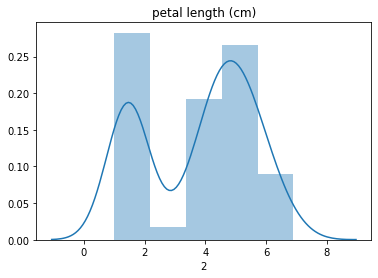

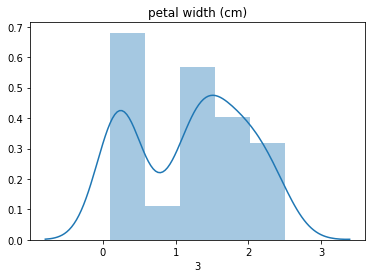

In [214]:
import seaborn as sns
for i in range(df_X.shape[1]):
    sns.distplot(df_X[i])
    plt.title(feature_names[i])
    plt.show()

# PCA

https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

In [215]:
# print(X)
# print()
# print(Y)

pca = PCA(n_components=2)
pca.fit(X)
PC_score = pca.transform(X)

print(PC_score[:5])
print(PC_score.shape)

# pca.fit(Y)
# PC_score = pca.transform(Y)

# print(PC_score[:5])
# print(PC_score.shape)

[[-2.68412563  0.31939725]
 [-2.71414169 -0.17700123]
 [-2.88899057 -0.14494943]
 [-2.74534286 -0.31829898]
 [-2.72871654  0.32675451]]
(150, 2)


In [216]:
# pca 의 eigen_vector
pca.components_

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [ 0.65658877,  0.73016143, -0.17337266, -0.07548102]])

# TODO 1

2차원 데이터가 주어졌을때 이를 scatter 하는 함수를 구현하시오.

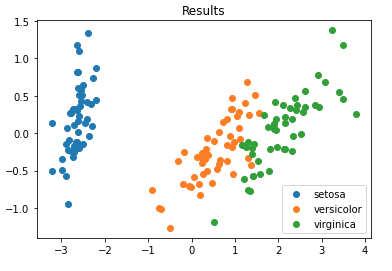

In [217]:
# 아래 그림은 정답 예시
Image("show2D_sample.png")

In [218]:
# Hint
# plt.legend(), plt.title(), plt.scatter() 함수 이용

def show2D(pca_score, Y, target_names):
    plt.figure()
    length = max(Y) + 1    # 타겟 개수

    plt.title("Results")

    dX = []
    dY = []

    for i in range(length):
        dX.append([])
        dY.append([])

    for i in range(len(pca_score)):
        dX[Y[i]].append(pca_score[i][0])
        dY[Y[i]].append(pca_score[i][1])

    
    for i in range(length):
        plt.scatter(dX[i], dY[i], marker="o")
    
    plt.legend(target_names)
    
    plt.show()
    # <--

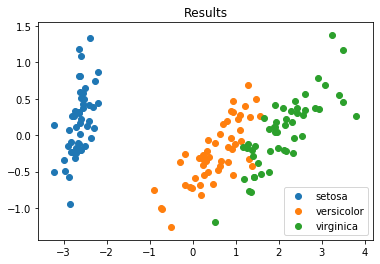

In [219]:
show2D(PC_score, Y, target_names)

# TODO 2

PCA 함수를 구현하시오.

## 요구사항
1. 아래의 numpy 내장 함수 사용 가능
    - ```numpy.mean()```
    - ```numpy.linalg.eig()```
    - ```numpy.dot()```

In [220]:
def student_pca(X, n_components=2):
    pca_results = None
    # TODO -->
    X = np.array(X)
    length = len(X[0])
    norm_X = X - X.mean(axis=0)

    cov_X = np.cov(norm_X.T)
    eigenvalue, eigenvector = np.linalg.eig(cov_X)

    stack = []
    for i in range(length):
        z = eigenvector[:,i][0] * norm_X[:,0]
        for j in range(1, length):
            z = z + eigenvector[:,i][j] * norm_X[:,j]
        stack.append(z)

    pca_result = np.vstack(stack).T
    pca_result = pca_result[:,:n_components]
        
    # <--
    return pca_result

pca_student_score = student_pca(X, n_components=2)

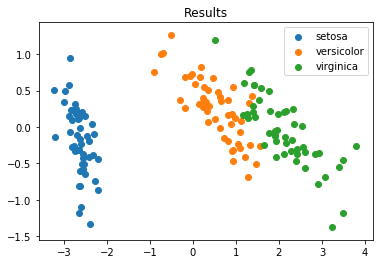

In [221]:
show2D(pca_student_score, Y, target_names)

# TODO 3

digits data 를 이용하여 PCA 결과를 확인하시오.

In [222]:
digits = datasets.load_digits()

In [223]:
# TODO -->

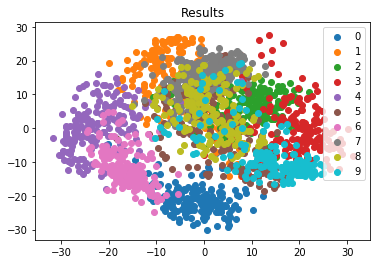

In [224]:
target_names = []
for i in range(len(digits['target_names'])):
    target_names.append(str(digits['target_names'][i]))
    
# print(target_names)

pca_digits_score = student_pca(digits["data"], n_components=2)
show2D(pca_digits_score, digits['target'], target_names)
# <--

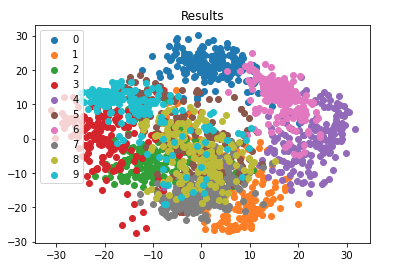

In [225]:
# 예시 정답
Image('digits_sample.png')

# TODO 4

TSNE 를 이용하여 digits 데이터의 결과를 Visualizing 하시오.

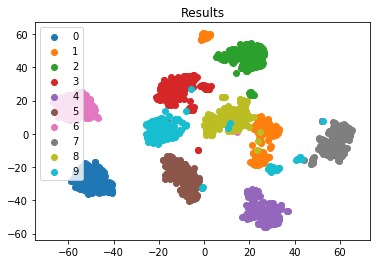

In [231]:
from sklearn.manifold import TSNE

# print(digits)
n_components = 2

t_sne = TSNE(n_components=n_components)

result = t_sne.fit_transform(digits.data)

show2D(result, digits['target'], target_names)

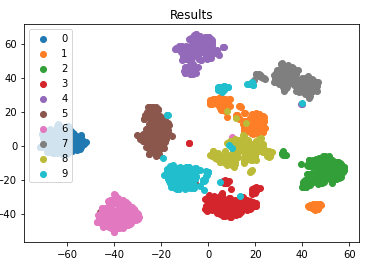

In [229]:
# 예시 정답
Image('tsne_sample.png')

# 과제 : PCA Reconstruction# 과제 : PCA reconstruction

Digits 데이터를 2차원, 3차원, 4차원, 32차원으로 PCA 한 결과를 reconstruction 했을 때 원래 데이터와의 MSE(Mean Square Error) 을 확인 및 복원데이터를 시각화하고 오차율이 다른 이유를 분석하여 보고서를 제출하시오. (코드, 분석내용 첨부)

- 제출형식: {분반}_{학번}_{이름}.zip (ex: 1_20210928_홍길동.zip)
- 제출파일: 보고서({분반}_{학번}_{이름}.pdf), 주피터노트북 파일({분반}_{학번}_{이름}.ipynb)
- 제출기한: 일주일 (사이버캠퍼스 참고)

In [232]:
digits = datasets.load_digits()

In [233]:
X = digits.data
Y = digits.target

# feature_names = digits.feature_names
target_names = digits.target_names

n_samples = X.shape[0]

images = X.reshape((n_samples, -1))

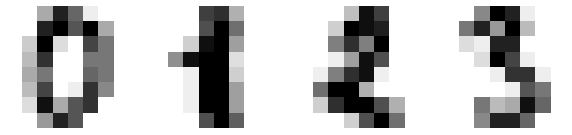

In [234]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image in zip(axes, images):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')

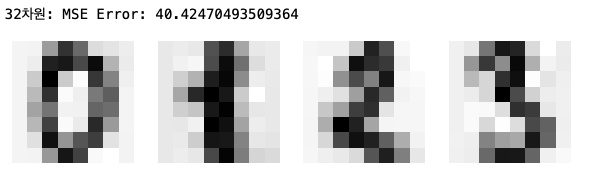

In [235]:
# 예시
Image('assignment_sample.png')

2-dim mse : 13.42101220076145
3-dim mse : 11.206800697129168
4-dim mse : 9.62798640712921
32-dim mse : 0.631636014610838


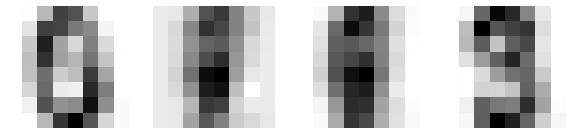

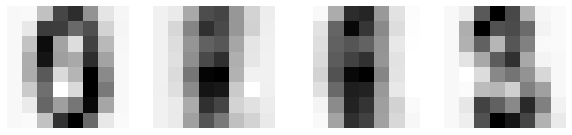

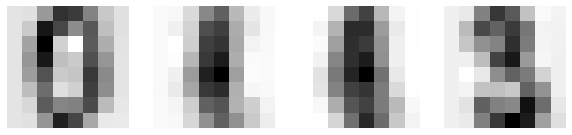

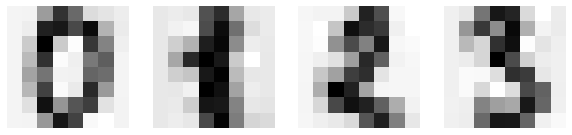

In [236]:
# TODO --> 
def draw(images):
    _, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
    for ax, image in zip(axes, images):
        ax.set_axis_off()
        image = image.reshape(8, 8)
        ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')


def reconstruct(origin, pca, n):    
    X = np.array(origin)
    meanX = X.mean(axis=0)
    length = len(X[0])
    pca = pca.T
    norm_X = X - X.mean(axis=0)    
    cov_X = np.cov(norm_X.T)
    _, eigenvector = np.linalg.eig(cov_X)
    eigenvector = eigenvector[:,:n]
    
    result = eigenvector@pca
    result = result.T
    result = result + meanX
    
#     print(n, "차원 복원 결과")
#     print(result)

    return result

def mse(y, t):
    return np.square(np.subtract(y, t)).mean()

pca2 = student_pca(digits["data"])
pca3 = student_pca(digits["data"], 3)
pca4 = student_pca(digits["data"], 4)
pca32 = student_pca(digits["data"], 32)

# 2차원 pca 복원
rev2 = reconstruct(digits.data, pca2, 2)
# 3차원 pca 복원
rev3 = reconstruct(digits.data, pca3, 3)
# 4차원 pca 복원
rev4 = reconstruct(digits.data, pca4, 4)
# 3차원 pca 복원
rev32 = reconstruct(digits.data, pca32, 32)

# 복원 데이터 그리기
# draw(digits.data)
draw(rev2)
draw(rev3)
draw(rev4)
draw(rev32)

ms2 = mse(digits.data, rev2)
print("2-dim mse :", mse2)
ms3 = mse(digits.data, rev3)
print("3-dim mse :", mse3)
ms4 = mse(digits.data, rev4)
print("4-dim mse :", mse4)
ms32 = mse(digits.data, rev32)
print("32-dim mse :", mse32)

